## Data Merge

matching images to the list in csv file 

## Building CNN model

### Preprocessing: 
##### Resizing
State-of-the-art networks are trained on (224,224,3) images.

##### Intensity normalization
Normalize image pixels whose values are between 0 and 255 for each colour.

##### Data augmentation
if more picture needed we can do some data agumentation like croping, rotations, slight transformation of the colors, change of the textures, "photoshop effects": blur, halo, ..., deformations

##### Data loader
use keras to do data loader



### Requirements


In [2]:
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import tensorflow
import os 
from PIL import Image
import glob

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import preprocess_input

### Care information

In [9]:
root_path = os.getcwd()
#csv_path = os.path.join(root_path,'..','data') the absolute path don't work always so need to be reworked later on
csv_path = r'C:\Users\User\code\Joshymitzu\plantbase\plantbase\data'
plants_care= pd.read_csv(os.path.join(csv_path,'plants_info_enhanced.csv'))
plants_care.head()

,Family,Genus,Species,Genus description,Genus details,Characteristics_Foliage,Characteristics_Habit,Characteristics _Hardiness,Colour in autumn fruits,Colour in autumn foliage,...,Soil pH,Size Ultimate height,Size Ultimate spread,Size Time to ultimate height,How to grow_Cultivation,How to grow_ Propogation,How to grow_ Suggested planting locations and garden types,How to care_ Pruning,How to care_Pests,How to care_Diseases
0,Agapanthaceae,Agapanthus,NaN,Agapanthus are clump-forming perennials with n...,Exmoor' is a clump-forming perennial with deci...,deciduous,Clump-forming,H4,NaN,green,...,"Neutral, Acid, Alkaline",0.5-1 metres,0.1-0.5 metres,2-5 years,"Grow in fertile, moist but well-drained soil i...",Propagate by division every three to four year...,Wall-side Borders Drought Resistant Cut Flower...,"In late autumn remove any remaining leaves, bu...",May be affected by agapanthus gall midge,A virus disease may be a problem
1,Asteraceae,Chrysanthemum,NaN,Chrysanthemum are erect woody-based perennials...,Constable' is a compact herbaceous perennial t...,Deciduous,Bushy,H3,NaN,green,...,"Neutral, Acid, Alkaline",0.1-0.5 metres,0.1-0.5 metres,1 year,Suited to pot cultivation for flowering outdoo...,Propagate by basal cuttings in early spring,Patio & Container Plants,Pinch out cuttings-raised plants at the start ...,May be susceptible to chrysanthemum leaf miner...,"Susceptible to chrysanthemum white rust, powde..."
2,Amaryllidaceae,Daffodils,NaN,Narcissus are bulbous herbaceous perennials wi...,"N. minor is a vigorous, dwarf trumpet daffodil...",Deciduous,Clump-forming,H5,NaN,NaN,...,"Neutral, Acid, Alkaline",0.1-0.5 metres,0-0.1 metre,2-5 years,Plant at one and a half to two times its own d...,Propagate by removing offsets as the leaves fa...,Cut Flowers Flower borders and beds Underplant...,Deadhead as flowers fade and allow the leaves ...,"May be attacked by slugs, large narcissus bulb...",Susceptible to narcissus basal rot


### Build x Y

In [ ]:
X_list = []
Y_list = []

In [ ]:
for index, rows in bumbulb_images.iterrows():
    pic_in_iter = np.array(Image.open(f'/Users/clementchausserie-lapree/code/Clement-CL/bumbulb/data/images/images_v2/{rows.image_title}.jpg'))
    X_list.append(pic_in_iter)
    Y_list.append(rows.species)

In [ ]:
len(X_list), len(Y_list)

In [ ]:
X = np.stack(X_list, axis=0)
Y = np.stack(Y_list, axis=0)

In [ ]:
len(X.shape), len(Y.shape)

In [ ]:
y = Y

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

encoder_2 = LabelBinarizer()
test_2 = encoder_2.fit_transform(y)

In [ ]:
test_2

In [ ]:
pd.Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, test_2, test_size=0.3, random_state=1)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
y_hot_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=25)
y_hot_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=25)

In [ ]:
y_hot_train

### Baseline model


In [3]:
directory = r"../raw_data/train_clean/train"

In [4]:
# creating the training dataset as a subset of our 'train' images folder
# labels are inferred from the subfolders

train_dataset = image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=123,
    validation_split=0.2, subset="training", interpolation='bilinear', follow_links=False
)

Found 4317 files belonging to 16 classes.
Using 3454 files for training.


In [67]:
train_dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [73]:
def count(counts, batch):
  features, labels = batch
  class_1 = labels == 1
  class_1 = tensorflow.cast(class_1, tensorflow.int32)

  class_0 = labels == 0
  class_0 = tensorflow.cast(class_0, tensorflow.int32)

  counts['class_0'] += tensorflow.reduce_sum(class_0)
  counts['class_1'] += tensorflow.reduce_sum(class_1)

  return counts

In [77]:
counts = train_dataset.take(32).reduce(
    initial_state={'class_0': 0, 'class_1': 0},
    reduce_func = count)

counts = np.array([counts['class_0'].numpy(),
                   counts['class_1'].numpy()]).astype(np.float32)

fractions = counts/counts.sum()
print(fractions)

[0.359375 0.640625]


### balanced dataset test

In [78]:
def class_func(features, label):
  return label

In [84]:
resampler = tensorflow.data.experimental.rejection_resample(
    class_func, target_dist=[1/16, 1/16], initial_dist=fractions)

In [85]:
resample_ds = train_dataset.unbatch().apply(resampler).batch(10)

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:



In [87]:
balanced_ds = resample_ds.map(lambda extra_label, features_and_label: features_and_label)

In [88]:
for features, labels in balanced_ds.take(10):
  print(labels.numpy())

InvalidArgumentError: indices = 10 is not in [0, 2)
	 [[{{node GatherV2}}]]

In [68]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [6]:
val_dataset = image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=123,
    validation_split=0.2, subset="validation", interpolation='bilinear', follow_links=False
)

Found 4317 files belonging to 16 classes.
Using 863 files for validation.


In [7]:
from tensorflow.keras import layers

In [8]:
img_height, img_width = (256,256)

In [9]:
num_classes = 16

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

In [12]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/10
108/108 [==============================] - 135s 1s/step - loss: 2.5967 - accuracy: 0.2041 - val_loss: 2.2482 - val_accuracy: 0.2978
Epoch 2/10
108/108 [==============================] - 121s 1s/step - loss: 2.0039 - accuracy: 0.3781 - val_loss: 1.9597 - val_accuracy: 0.3893
Epoch 3/10
108/108 [==============================] - 111s 1s/step - loss: 1.6023 - accuracy: 0.5009 - val_loss: 1.8513 - val_accuracy: 0.4195
Epoch 4/10
108/108 [==============================] - 112s 1s/step - loss: 1.2018 - accuracy: 0.6181 - val_loss: 2.0073 - val_accuracy: 0.4206
Epoch 5/10
108/108 [==============================] - 136s 1s/step - loss: 0.7912 - accuracy: 0.7496 - val_loss: 2.6062 - val_accuracy: 0.3917
Epoch 6/10
108/108 [==============================] - 114s 1s/step - loss: 0.4808 - accuracy: 0.8518 - val_loss: 2.8944 - val_accuracy: 0.3963
Epoch 7/10
108/108 [==============================] - 110s 1s/step - loss: 0.2771 - accuracy: 0.9184 - val_loss: 3.5489 - val_accuracy: 0.4021

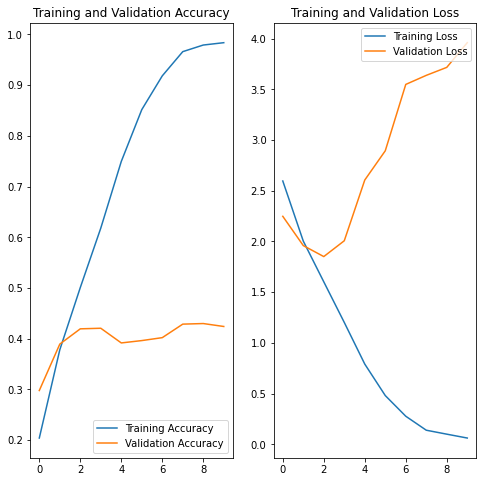

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Exploring the tensor dataset object

In [79]:
train_dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [90]:
for images, label in train_dataset.take(1):
  print('images.shape: ', images.shape)
  print('labels.shape: ', label.shape)

images.shape:  (32, 256, 256, 3)
labels.shape:  (32,)


### testing the image data generator with flow_from_dataframe

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
plants_df = pd.read_csv("../plantbase/data/plants_with_image_dimensions_v1.csv")

In [56]:
plants_df.head()

,Unnamed: 0,id,family,genus,species,content,filename,image_height,image_width
0,0,1,Amaryllidaceae,Narcissus,Narcissus dubius Gouan,Entire,1.jpg,512,800
1,1,100014,Scrophulariaceae,Verbascum,Verbascum pulverulentum Vill.,Leaf,100014.jpg,600,800
2,2,100022,Orchidaceae,Ophrys,Ophrys scolopax Cav.,Entire,100022.jpg,587,800
3,3,100038,Iridaceae,Iris,Iris lutescens Lam.,Flower,100038.jpg,600,800
4,4,100069,Rosaceae,Crataegus,Crataegus azarolus L.,Stem,100069.jpg,800,533


In [57]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [59]:
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed = 123) # set as training data

validation_generator = train_datagen.flow_from_directory(
    directory, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed = 123) # set as validation data

Found 3460 images belonging to 16 classes.
Found 857 images belonging to 16 classes.


In [66]:
train_generator.samples/32

108.125

In [64]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = 10)

Epoch 1/10
 17/108 [===>..........................] - ETA: 1:23 - loss: 2.8929 - accuracy: 0.1158

KeyboardInterrupt: 

### Prediction Testing

In [26]:
plants_df = pd.read_csv("../plantbase/data/priority_plants_VF.csv")

In [27]:
columns = np.sort(plants_df.genus.unique())
columns

array(['Ajuga', 'Allium', 'Campanula', 'Cirsium', 'Crataegus', 'Gentiana',
       'Geranium', 'Iris', 'Malva', 'Narcissus', 'Ophrys', 'Rosa',
       'Trifolium', 'Verbascum', 'Veronica', 'Viola'], dtype=object)

In [28]:
rename_columns = {}
col_index = 0
for n in columns:
    rename_columns[col_index] = n
    col_index += 1

In [29]:
rename_columns

{0: 'Ajuga',
 1: 'Allium',
 2: 'Campanula',
 3: 'Cirsium',
 4: 'Crataegus',
 5: 'Gentiana',
 6: 'Geranium',
 7: 'Iris',
 8: 'Malva',
 9: 'Narcissus',
 10: 'Ophrys',
 11: 'Rosa',
 12: 'Trifolium',
 13: 'Verbascum',
 14: 'Veronica',
 15: 'Viola'}

In [17]:
tst_img = tensorflow.keras.preprocessing.image.load_img(
    rf"../raw_data/test/0.jpg", target_size=(256, 256))

tst_img_array = tensorflow.keras.preprocessing.image.img_to_array(tst_img)
tst_img_array = tensorflow.expand_dims(tst_img_array, 0)

In [33]:
tst_img_2 = tensorflow.keras.preprocessing.image.load_img(
    rf"../raw_data/test/0.jpg", target_size=(256, 256))
tst_img_array_2 = tensorflow.keras.preprocessing.image.img_to_array(tst_img_2)
tst_img_array_2 = tensorflow.expand_dims(tst_img_array_2, 0)

In [46]:
y_pred = model.predict(tst_img_array_2)

In [47]:
y_pred[0]

array([ 1.1619766, -3.5667787,  1.3904792,  0.7732428, -0.2743085,
        2.7028716,  1.7684596,  2.493756 ,  2.6834266,  1.798835 ,
        5.139251 , -0.5960677,  1.2469089,  1.3894913,  4.551381 ,
        3.203827 ], dtype=float32)

In [48]:
y_pred.shape

(1, 16)

In [49]:
y_pred_df = pd.DataFrame(y_pred)

In [50]:
y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.161977,-3.566779,1.390479,0.773243,-0.274309,2.702872,1.76846,2.493756,2.683427,1.798835,5.139251,-0.596068,1.246909,1.389491,4.551381,3.203827


In [51]:
y_pred_df = y_pred_df.rename(columns = rename_columns)

In [52]:
y_pred_df['pred_genus'] = y_pred_df.idxmax(axis = 1)

In [53]:
y_pred_df.loc[0]

Ajuga          1.16198
Allium        -3.56678
Campanula      1.39048
Cirsium       0.773243
Crataegus    -0.274309
Gentiana       2.70287
Geranium       1.76846
Iris           2.49376
Malva          2.68343
Narcissus      1.79884
Ophrys         5.13925
Rosa         -0.596068
Trifolium      1.24691
Verbascum      1.38949
Veronica       4.55138
Viola          3.20383
pred_genus      Ophrys
Name: 0, dtype: object

In [88]:
y_pred_df['pred_genus'].head()

0    Hyacinthoides
1           Ophrys
2        Crataegus
3           Ophrys
4        Verbascum
Name: pred_genus, dtype: object

In [ ]:
prediction_vec_df = y_pred_df[['pred_species']].copy()
prediction_vec_df['true_species'] = y_true_df['true_species'].copy()
prediction_vec_df['result'] = (y_pred_df['pred_species'] == y_true_df['true_species'])

### Failed test

In [35]:
def build_model():
    
    model = Sequential()
    model.add(Conv2D(30, (5,5), strides=(1,1), padding='valid', input_shape=(256,256, 3), activation='relu')) # change shape of the pictures based on the new shape
    model.add(MaxPooling2D(3))
    
    model.add(Conv2D(60, (2, 2), padding='same', activation='relu'))
    model.add(MaxPooling2D(3))
    
    model.add(Conv2D(50, (2, 2), padding='same', activation='relu'))
    model.add(MaxPooling2D(3))
    
    model.add(Flatten())
    model.add(Dense(25))
    model.add(Dense(16, activation = 'softmax'))
    
    return model

model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 252, 252, 30)      2280      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 84, 84, 30)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 84, 84, 60)        7260      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 50)        12050     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 9, 9, 50)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4050)             

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='min')

In [38]:
# make sure we are using the right  data for validation 

epochs=10
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/10


ValueError: in user code:

    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    c:\users\joshu\.venvs\lewagon\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 16) are incompatible


### Save trainded baseline model

In [ ]:
import joblib
from tensorflow.keras.models import model_from_json

In [ ]:
model_json = model.to_json()
with open("bumbulb_baseline_cnn.json", "w") as json_file: # change the picture 
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

### Load baseline model

In [ ]:
# load json and create model
json_file = open('bumbulb_baseline_cnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Analyzing results 

In [ ]:
history.history

In [ ]:
history_df = pd.DataFrame.from_dict(history.history, orient='index').transpose()

In [ ]:
plt.plot(history_df)
plt.legend(history_df.columns)

In [ ]:
results = model.evaluate(X_test, y_hot_test, batch_size=32)

### Visualise results

In [ ]:
y_pred = loaded_model.predict(X_test)

In [ ]:
np.sort(y_pred[0])

In [ ]:
y_pred.shape

In [ ]:
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
columns = np.unique(y)

In [ ]:
rename_columns = {}
col_index = 0
for n in columns:
    rename_columns[col_index] = n
    col_index += 1

In [ ]:
rename_columns

In [ ]:
y_pred_df = y_pred_df.rename(columns = rename_columns)

In [ ]:
y_pred_df.loc[0]

In [ ]:
y_pred_df['pred_species'] = y_pred_df.idxmax(axis=1)

In [ ]:
y_pred_df['pred_species']

In [ ]:
y_true_df = pd.DataFrame(y_hot_test).rename(columns = rename_columns)

In [ ]:
y_true_df['true_species'] = y_true_df.idxmax(axis=1)

In [ ]:
prediction_review = (y_pred_df['pred_species'] == y_true_df['true_species'])

In [ ]:
prediction_review.count()

In [ ]:
prediction_vec_df = y_pred_df[['pred_species']].copy()
prediction_vec_df['true_species'] = y_true_df['true_species'].copy()
prediction_vec_df['result'] = (y_pred_df['pred_species'] == y_true_df['true_species'])

In [ ]:
prediction_vec_df['false'] = prediction_vec_df['result'].apply(lambda x: 1 if x == False else 0)
prediction_vec_df['true'] = prediction_vec_df['result'].apply(lambda x: 1 if x == True else 0)
prediction_vec_df.head(2)

In [ ]:
true_pos_neg = prediction_vec_df.groupby('true_species').sum().drop(columns=['result'])
true_pos_neg['percent_true'] = true_pos_neg['true'] / (true_pos_neg['true'] + true_pos_neg['false'])

In [ ]:
success_ratio = round(true_pos_neg[['percent_true']]*100).sort_values(by='percent_true', ascending=False)

In [ ]:
success_ratio

In [ ]:
success_ratio.plot.bar()

In [ ]:
plt.figure(figsize=(20,15))
chart = sns.countplot(
    x="true_species", data=prediction_vec_df,
    palette='Set1', hue='result', order=success_ratio.index)
chart_rotate = chart.set_xticklabels(chart.get_xticklabels(), rotation=70)

In [ ]:
plt.figure(figsize=(10,20))
chart = sns.countplot(
    y="true_species", data=prediction_vec_df,
    palette='Set1', hue='angle', order=success_ratio.index)
chart_rotate = chart.set_xticklabels(chart.get_xticklabels(), rotation=70)

In [ ]:
plt.figure(figsize=(5,5))
chart = sns.countplot(
    x="angle", data=prediction_vec_df,
    palette='Set1', hue='result')
chart_rotate = chart.set_xticklabels(chart.get_xticklabels(), rotation=70)

#### VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    return model

In [ ]:
model = load_model()
model.summary()

In [ ]:
def update_model(model):
    # Set the first layers to be untrainable
    model.trainable = False
    
    # Add layers to the mdoel
    flatten_layer = Flatten()
    dense_layer = Dense(500, activation='relu')
    prediction_layer = Dense(25, activation='softmax')

    model = Sequential([
        model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    
    return model

In [ ]:
model = update_model(model)
model.summary()

In [ ]:
def compile_model(model):
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [ ]:
def build_model():
    
    model = load_model()
    model = update_model(model)
    model = compile_model(model)
    
    return model

model = build_model()

In [ ]:
X_train_vg = preprocess_input(X_train) 
X_test_vg = preprocess_input(X_test)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(train_dataset, 
                    validation_data = val_dataset, 
                    epochs=5,  
                    callbacks=[es])